In [1]:
import numpy as np
import pandas as pd

In [2]:
filename = 'train.csv'
train = pd.read_csv(filename)
print(df.loc[:, ['Age']])

NameError: name 'df' is not defined

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()  
#通过info()这个函数我们可要知道，哪些特征的数值类型是什么。比如，上面PassengerId，Survived，Pclass，Age等是数值型数据，
#而Name，Sex，Ticket等是字符型数据。字符型数据肯定到后面是要转换的，可能转换成one-hot类型的。不过数值型数据也可能是需要转换的。
#————————————————
#版权声明：本文为CSDN博主「YakultFF」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/weixin_43869610/article/details/108138753#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()
#通过isnull()可以看出哪些列缺失了数据，缺失了多少行。只有对缺失数据的处理有很多种，比如说填充，或者删去。

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

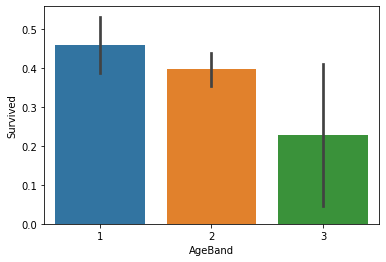

In [10]:
import seaborn as sns
examine = train.copy() # 这边将训练数据集备份一份
examine['AgeBand'] = pd.cut(examine['Age'],[0,20,60,80],labels = ['1','2','3'])
sns.barplot(x='AgeBand', y='Survived', data=examine)
plt.show()

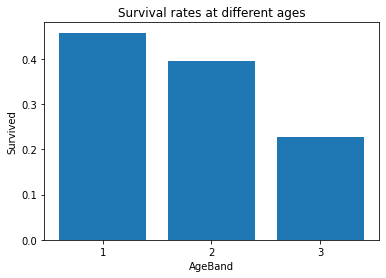

In [8]:
import matplotlib.pyplot as plt
df = pd.DataFrame(train)
a=b=c=d=e=f=0
for i in range(0,890):
        if (float(df.loc[i, ['Age']]) <= 20):
            a = a+1
            if(float(df.loc[i, ['Survived']]) == 1):
                b=b+1            
        if (20<float(df.loc[i, ['Age']])<60):
            c=c+1
            if(float(df.loc[i, ['Survived']]) == 1):
                d=d+1 
        if (60<float(df.loc[i, ['Age']])):
            e=e+1
            if(float(df.loc[i, ['Survived']]) == 1):
                f=f+1
names = ['1', '2', '3']
values = [b/a, d/c, f/e]
plt.title('Survival rates at different ages')
plt.xlabel('AgeBand')
plt.ylabel('Survived')
plt.bar(names, values)
plt.show()

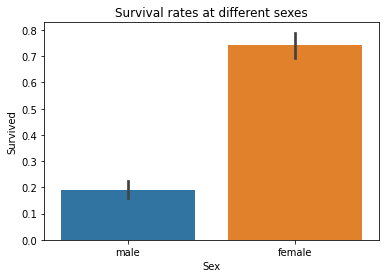

In [9]:
sns.barplot(x="Sex", y="Survived", data=examine)
plt.title('Survival rates at different sexes')
plt.show()

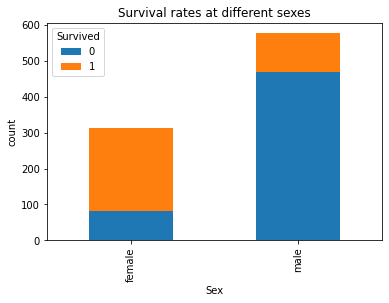

In [11]:
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
examine.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Survival rates at different sexes')
plt.ylabel('count')
plt.show()

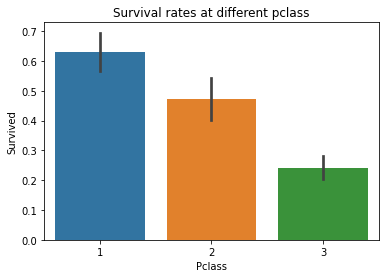

In [12]:
sns.barplot(x="Pclass", y="Survived", data=examine)
plt.title('Survival rates at different pclass')
plt.show()

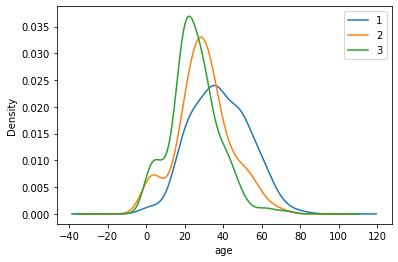

In [13]:
examine.Age[examine.Pclass == 1].plot(kind='kde')
examine.Age[examine.Pclass == 2].plot(kind='kde')
examine.Age[examine.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")
plt.show()

In [14]:
#删除cabin，name，ticket三列
train.drop(['Cabin', 'Name', 'Ticket'], inplace=True, axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
#均值填充age列
train["Age"] = train["Age"].fillna(train["Age"].mean())
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [16]:
#embarked列有两个缺失值，删掉
train = train.dropna()

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
#二分变量'sex'转化为0、1
train['Sex'] = (train['Sex'] == 'male').astype(np.int64)

In [25]:
#对于一维数组或者列表，unique函数去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表
#tolist将数组或者矩阵转化为列表
#然后将三分类变量'Embarked'转换成0、1、2。
labels = train['Embarked'].unique().tolist()
train['Embarked'] = train['Embarked'].apply(lambda x : labels.index(x))

0

In [ ]:
#将数据中的训练变量和标签分开
X = train.iloc[:, train.columns != 'Survived']
y = train.iloc[:, train.columns == 'Survived']
X.shape, y.shape
# 输出
# (889, 8), (889, 1)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25)
Xtrain.shape, Xtest.shape

In [ ]:
Xtrain,Ytrain

In [ ]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.reset_index(drop=True, inplace=True)

In [ ]:
Xtrain,Ytrain

In [ ]:
###模型搭建及模型评估

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
#决策树
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xtrain, Ytrain)
# 查看验证集score值
print("Testing set score: {:.2f}".format(clf.score(Xtest, Ytest)))
# Testing set score: 0.74

In [ ]:
score = cross_val_score(clf,X,y,cv=10).mean()
# 0.757
score

In [ ]:
tr = []
te = []
for i in range(1, 11):
    clf = DecisionTreeClassifier(random_state=0,max_depth=i,criterion="entropy")
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show

In [ ]:
#逻辑回归

In [ ]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)
print("Testing set score: {:.2f}".format(lr.score(Xtest, Ytest)))
# Testing set score: 0.80

In [ ]:
score = cross_val_score(lr,X,y,cv=10).mean()
score

In [ ]:
#随机森林

In [ ]:
test = []
for i in range(1, 11):
    rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=20)
    score = cross_val_score(rfc, X, y, cv=10)
    test.append(score.mean())
plt.plot(range(1, 11), test)

In [ ]:
#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
test = []

for i in range(10, 50, 5):
    clf = BaggingClassifier(n_estimators=i)
    score = cross_val_score(clf, X, y, cv=10)
    test.append(score.mean())
print(max(test))
plt.plot(range(10, 50, 5), test)
plt.ylabel('score')
plt.xlabel('n_estimators')

In [ ]:
#LGBClassifier
#!pip lightgbm -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
test = []
for i in range(10, 100, 5):
    lgb = LGBMClassifier(max_depth=2, n_estimators=i)
    score = cross_val_score(lgb, X, y, cv=10)
    test.append(score.mean())
print(max(test))    
plt.plot(range(10, 100, 5), test)
plt.ylabel('score')
plt.xlabel('n_estimators')

In [ ]:
clf = [None]*5
clf[0] = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf[1] = LogisticRegression()
clf[2] = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=20)
clf[3] = BaggingClassifier(n_estimators=20)
clf[4] = LGBMClassifier(max_depth=2, n_estimators=40)

predictFrame = pd.DataFrame()
for model in clf:
    model.fit(Xtrain, Ytrain)
    predictFrame[str(model)[:14]] = model.predict(Xtest)

te = []
for i in range(1, 10):
    clf_ = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
    score = cross_val_score(clf_, predictFrame, Ytest, cv=10, scoring='precision')
    te.append(score.mean())
    
plt.plot(range(1,10), te)